<a href="https://colab.research.google.com/github/MaewTeam/Day8_ex_fft/blob/master/Ex2_fft_1D_sinwave_3frq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ตัวอย่าง
   การเขียนโปรแกรมเพื่อจำลองการใช้สมการทางคณิตศาสตร์ เพื่อสร้างคลื่ืนสัญญาณ Sin จำนวน
   3 สัญญาณ ที่ความถี่ต่างๆ กัน และ นำสัญญาณเหล่านั้นมาทำการ รวมกัน และทำการแปลงค่า ฟูเรียร์ เพื่อจำแนกความถี่ประกอบ ของสัญญาณที่ถูกรวมกันไว้

ให้นักศึกษา ทดลองเปลี่ยนแปลง ค่า amplitude และ ค่าความถี่ (frq1,frq2,frq3 : frequency )เป็นดังนี้
1.  จงแก้ไขข้อมูลที่กำหนดให้ตัวแปร ชื่อ frq1,frq2,frq3 ให้มีค่าดังนี้ ที่ละ ค่าแล้วไปทำการรันเพื่อสังเกตุผลลัพธ์
     <table>
  <caption>ความถี่ (Hz) </caption>
  <tr>
    <td></td>
    <td>ครั้งที่ 1</td>
    <td>ครั้งที่ 2</td>
    <td>ครั้งที่ 3</td>
  </tr>
  <tr>
    <td>frq1</td>
    <td>1500</td>
    <td>500</td>
    <td>50</td>
  </tr>
  <tr>
    <td>frq2</td>
    <td>30</td>
    <td>700</td>
    <td>900</td>
  </tr>
  <tr>
    <td>frq3</td>
    <td>200</td>
    <td>1500</td>
    <td>2300</td>
  </tr>
    <tr>
    <td>Amplitude1</td>
    <td>15</td>
    <td>2</td>
    <td>7</td>
  </tr>
  <tr>
    <td>Amplitude2</td>
    <td>1</td>
    <td>5</td>
    <td>10</td>
  </tr>
  <tr>
    <td>Amplitude3</td>
    <td>15</td>
    <td>4</td>
    <td>9</td>
  </tr>
</table>


        

In [0]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
%matplotlib inline

In [0]:
amplitude1 = 5 #ค่าความสูงของสัญญาณ Signal 1
amplitude2 = 15 #ค่าความสูงของสัญญาณ Signal 2
amplitude3 = 10 #ค่าความสูงของสัญญาณ Signal 3

In [0]:
Fs = 300.0;  # ค่า sampling rate
Ts = 1.0/Fs; # ค่า้เวลาที่จะใช้ในการสุ่มข้อมูล เพื่อแบ่งช่วงเวลาออกเป็น ช่องขนาดเล็กๆ ตัวอย่าง ช่วง 0 - 1 แบ่งออกเป็น จำนวน 300  ชุด 
t = np.arange(0,1,Ts) #ช่วงเวลา(t)ที่ใช้ในการเปลี่ยนแปลง 0 - 1

In [0]:
frq1 = 2;   # ค่าความถี่ signal_1 ความถี่ 2 Hz
signal_1 = amplitude1 * np.sin(2*np.pi*frq1*t)

In [0]:
frq2 = 10;   # ค่าความถี่ signal_2 ความถี่ 10 Hz
signal_2 = amplitude2 * np.sin(2*np.pi*frq2*t)

In [0]:
frq3 = 100;   # ค่าความถี่ signal_3 ความถี่ 100 Hz
signal_3 = amplitude3 * np.sin(2*np.pi*frq3*t)

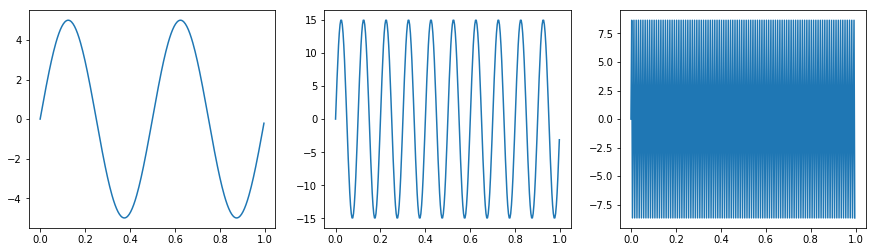

In [124]:
#ใช้ในการกำหนดขนาดกราฟที่ต้องการแสดงผล
plt.figure(figsize = (15,4))

plt.subplot(131)
plt.plot(t, signal_1, label='Signal_1')
plt.subplot(132)
plt.plot(t, signal_2, label='Signal_2')
plt.subplot(133)
plt.plot(t, signal_3, label='Signal_3')



In [0]:
n1 = len(signal_1) # length of the signal
n2 = len(signal_2) # length of the signal
n3 = len(signal_3) # length of the signal
k1 = np.arange(n1)
k2 = np.arange(n2)
k3 = np.arange(n3)
T1 = n1/Fs
T2 = n2/Fs
T3 = n3/Fs

In [0]:
f1 = k1/T1 # two sides frequency range
f2 = k2/T2
f3 = k3/T3

Signal 1


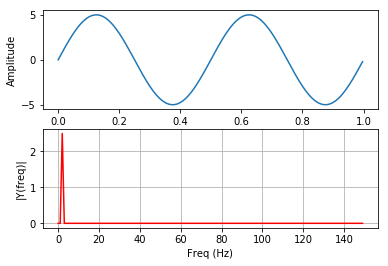

In [127]:
print('Signal 1')
frq1 = f1[range(int(n1/2))] # one side frequency range
Y1 = np.fft.fft(signal_1)/n1 # fft computing and normalization
Y1 = Y1[range(int(n1/2))]

fig, ax = plt.subplots(2, 1)

ax[0].plot(t,signal_1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq1,abs(Y1),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plt.grid()
plt.show()

Signal 2


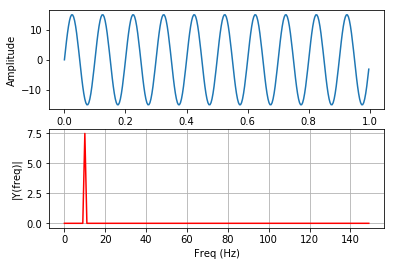

In [128]:
print('Signal 2')
frq2 = f1[range(int(n2/2))] # one side frequency range
Y2 = np.fft.fft(signal_2)/n2 # fft computing and normalization
Y2 = Y2[range(int(n2/2))]

fig, ax = plt.subplots(2, 1)

ax[0].plot(t,signal_2)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq1,abs(Y2),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plt.grid()
plt.show()

Signal 3


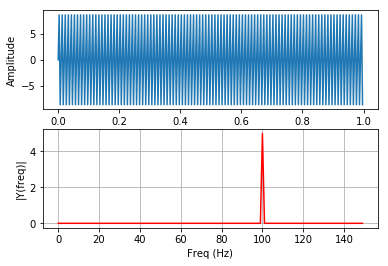

In [129]:
print('Signal 3')
frq3 = f3[range(int(n3/2))] # one side frequency range
Y3 = np.fft.fft(signal_3)/n3 # fft computing and normalization
Y3 = Y3[range(int(n3/2))]

fig, ax = plt.subplots(2, 1)

ax[0].plot(t,signal_3)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq1,abs(Y3),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plt.grid()
plt.show()

In [0]:
sum_signal = signal_1 + signal_2 + signal_3
n4 = len(sum_signal) # length of the signal
k4 = np.arange(n4)
T4 = n4/Fs
f4 = k4/T4

Modulation Signal 


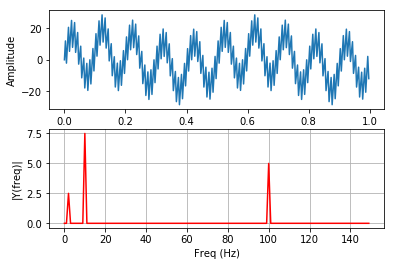

In [134]:
print('Modulation Signal ')
frq4 = f4[range(int(n4/2))] # one side frequency range
Y4 = np.fft.fft(sum_signal)/n4 # fft computing and normalization
Y4 = Y4[range(int(n4/2))]

fig, ax = plt.subplots(2, 1)

ax[0].plot(t,sum_signal)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq1,abs(Y4),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plt.grid()
plt.show()

จากผลการทดลองพบว่า

ครั้งที่ 1 ความถี่ใดมีค่า  Magnitude มากที่สุด




ครั้งที่ 2 ความถี่ใดมีค่า  Magnitude มากที่สุด




ครั้งที่ 3 ความถี่ใดมีค่า  Magnitude มากที่สุด

